# Supervised Learning Algorithms: Logistic Regression

<b>Logistic regression</b> is a statistical model used for analyzing datasets where there are one or more independent variables (features) that can be used to predict the outcome of a categorical dependent variable (target). It's particularly useful when the dependent variable is binary, meaning it has only two possible outcomes (e.g., 0 or 1, yes or no, true or false).
<b>Note: </b>For multi-class classification tasks (i.e., more than two classes), logistic regression can be extended using techniques like one-vs-all (also known as one-vs-rest) or softmax regression.

Some key points about logistic regression:
<ul>
    <li>
        <b>Binary Outcome:</b> As mentioned, logistic regression is used when the dependent variable is binary. For example, it could be used to predict whether a student will pass or fail an exam based on the number of hours they studied. (But, it can also be extended to multi-class classification tasks)
    </li>
    <li>
        <b>Note:</b> For multi-class classification tasks (i.e., more than two classes), logistic regression can be extended using techniques like one-vs-all (also known as one-vs-rest) or softmax regression.
    </li>
    <li>
        <b>Sigmoid Function:</b> The core of logistic regression is the sigmoid function, also known as the logistic function. The sigmoid function transforms any real-valued number to a value between 0 and 1. It is defined as follows:
    </li>
</ul>

$ \sigma(x) = \frac{1}{1 + e^{-x}} $ where,
$ x = x_{0} + \beta_{1} \times x_{1} + ... + \beta_{n} \times x_{n} $

In [116]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [140]:
# Defining Sigmoid function
def Sigmoid(X):
    return 1/(1 + np.exp(-X))

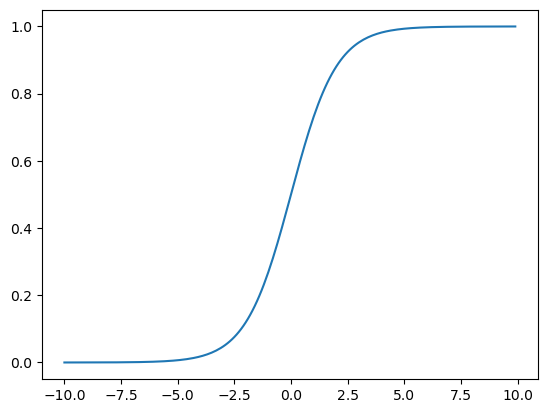

In [141]:
# Plotting Sigmoid function
X = list(x * 0.1 for x in range(-100, 100))
y = list(Sigmoid(x) for x in X )

plt.plot(X, y)
plt.show()

## Demo 1: Simple Logistic Regression

<b>Problem: </b> As a simple example, we can use a logistic regression with <b>one independet variable (feature)</b> and <b>one output (target)</b> to answer the following question:

A group of 20 students spends between 0 and 6 hours studying for an exam. How does the number of hours spent studying affect the probability of the student passing the exam?

The reason for using logistic regression for this problem is that the values of the dependent variable, pass and fail, while represented by "1" and "0", are not cardinal numbers. If the problem was changed so that pass/fail was replaced with the grade 0–100 (cardinal numbers), then simple regression analysis could be used.

The table shows the number of hours each student spent studying, and whether they passed (1) or failed (0).

Source: https://en.wikipedia.org/wiki/Logistic_regression

In [142]:
hours_studying = [0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,5.00,5.50]
pass_exam = [0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1]

d = {'hours_studying':hours_studying, 'pass_exam':pass_exam}
df = pd.DataFrame(data = d)

<AxesSubplot:>

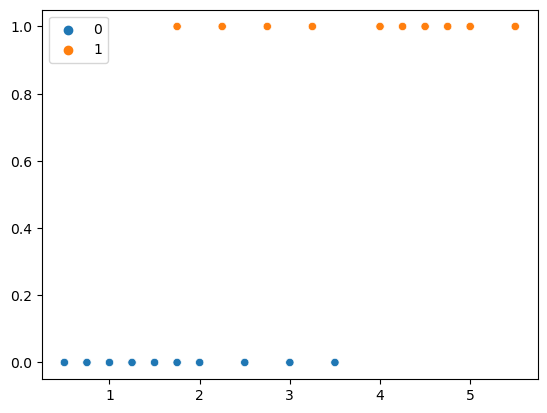

In [143]:
sns.scatterplot(x = hours_studying, y = pass_exam, hue = pass_exam)

### Logistic Regression Model

$ P(y = 1 | X;\beta) = \sigma(X) = \frac{1}{1 + e^{-X}} $ where,
<br>
$ X = x_{0} + \beta_{1} \times x_{1}$
<br>
$ x_{1} $ is the hours studying
<br>
$ \beta_0 $ is the intercept and $ \beta_1 $ is the coefficient of $x_1$

In [154]:
w_0 = 0 #-3.13952411
w_1 = 1 #1.14860386

In [155]:
X = w_0 + w_1 * df['hours_studying']
y = Sigmoid(X)

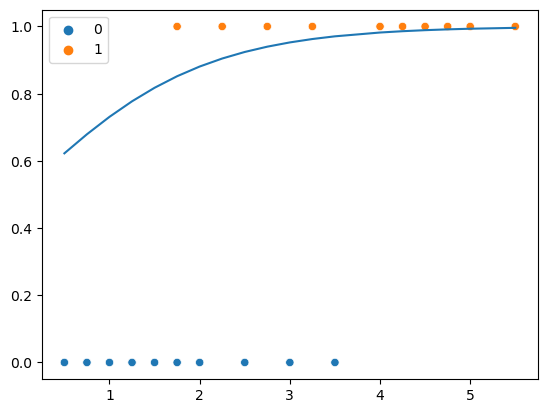

In [156]:
sns.scatterplot(x = hours_studying, y = pass_exam, hue = pass_exam)
plt.plot(df['hours_studying'], y)

In [129]:
## TO-DO Task: Try to compute w_0 and w_1 using gradient descent

## Demo 2: Multiple Logistic Regression - Social Network Ads

<b>Problem: </b> A categorical dataset to determine whether a user purchased a particular product

In [14]:
df = pd.read_csv("Social_Network_Ads.csv")

In [15]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [16]:
## Considering two independent variables/features and one output (0 Not purchased, 1 Purchased)
features = ['Age', 'EstimatedSalary']
target = ['Purchased']

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

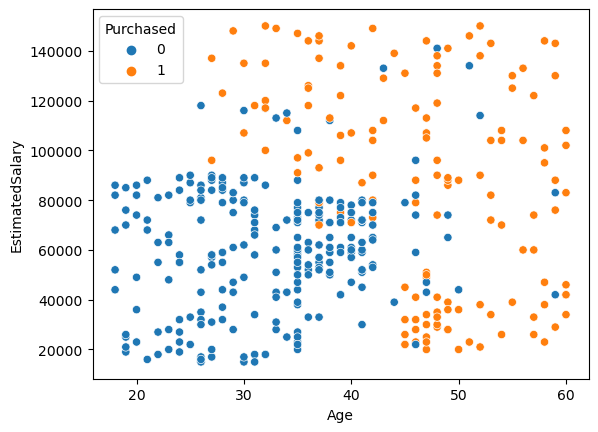

In [17]:
sns.scatterplot(x = df["Age"], y = df["EstimatedSalary"], hue = df.Purchased)

In [87]:
### TO-DO Tasks: Compute the coefficients using Gradien Descent and draw the decision boundary